# Mushroom Classification: Poisonous or Edible

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use('ggplot')

import src.helper as hlp

## Loading and Splitting Data

In [3]:
# Load csv data
mushrooms = pd.read_csv('data/mushrooms.csv')
mushrooms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Get target variable array - 'class': 'p' for poisonous or 'e' for edible
target = 'class'
y_df = mushrooms[target]
y = y_df.to_numpy()
y.shape

(8124,)

In [5]:
# Store feature names, create features array
X_df = mushrooms.drop(columns=[target])
features = X_df.columns
X = X_df.to_numpy()
X.shape

(8124, 22)

In [6]:
# Train/Test Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## EDA (Train Data)

In [7]:
X_train.shape

(5686, 22)

In [8]:
y_train.reshape((5686,1))

array([['p'],
       ['e'],
       ['p'],
       ...,
       ['e'],
       ['p'],
       ['e']], dtype=object)

In [9]:
# Recreate dataframe with X/y train data
Xy_train_df = pd.DataFrame(X_train, columns=features)
Xy_train_df[target] = y_train
Xy_train_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,b,t,f,f,c,b,h,t,...,w,w,p,w,o,p,h,v,u,p
1,x,f,g,t,n,f,c,b,p,t,...,p,w,p,w,o,p,k,y,d,e
2,x,f,g,f,f,f,c,b,p,e,...,n,b,p,w,o,l,h,v,d,p
3,x,y,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,k,n,g,e
4,x,y,n,f,y,f,c,n,b,t,...,w,p,p,w,o,e,w,v,d,p


In [10]:
# Get column types, number null - All objects/categorical, no nulls
Xy_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5686 entries, 0 to 5685
Data columns (total 23 columns):
cap-shape                   5686 non-null object
cap-surface                 5686 non-null object
cap-color                   5686 non-null object
bruises                     5686 non-null object
odor                        5686 non-null object
gill-attachment             5686 non-null object
gill-spacing                5686 non-null object
gill-size                   5686 non-null object
gill-color                  5686 non-null object
stalk-shape                 5686 non-null object
stalk-root                  5686 non-null object
stalk-surface-above-ring    5686 non-null object
stalk-surface-below-ring    5686 non-null object
stalk-color-above-ring      5686 non-null object
stalk-color-below-ring      5686 non-null object
veil-type                   5686 non-null object
veil-color                  5686 non-null object
ring-number                 5686 non-null object
ring-type  

In [11]:
hlp.print_unique_ct(Xy_train_df)

Count of Unique Values per Column:

cap-shape: 6
cap-surface: 4
cap-color: 10
bruises: 2
odor: 9
gill-attachment: 2
gill-spacing: 2
gill-size: 2
gill-color: 12
stalk-shape: 2
stalk-root: 5
stalk-surface-above-ring: 4
stalk-surface-below-ring: 4
stalk-color-above-ring: 9
stalk-color-below-ring: 9
veil-type: 1
veil-color: 4
ring-number: 3
ring-type: 5
spore-print-color: 9
population: 6
habitat: 7
class: 2


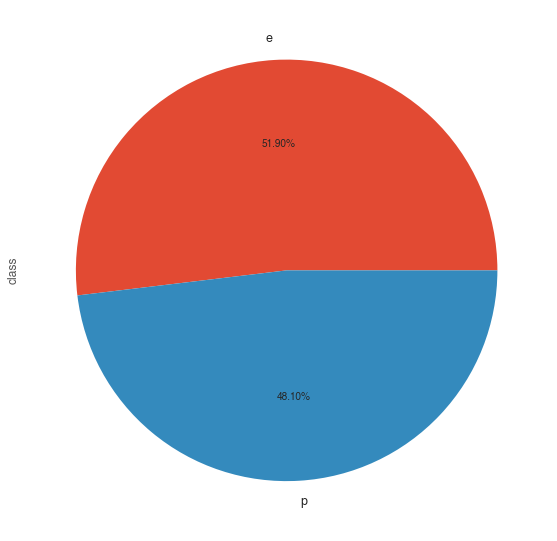

In [12]:
# Plot pie to see class balance - Pretty balanced
fig, ax = plt.subplots(figsize=(8,8))
groupby_ct = hlp.plot_pie(Xy_train_df['class'], fig, ax)

(<Figure size 1008x1296 with 24 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1971a9d0>,
       dtype=object))

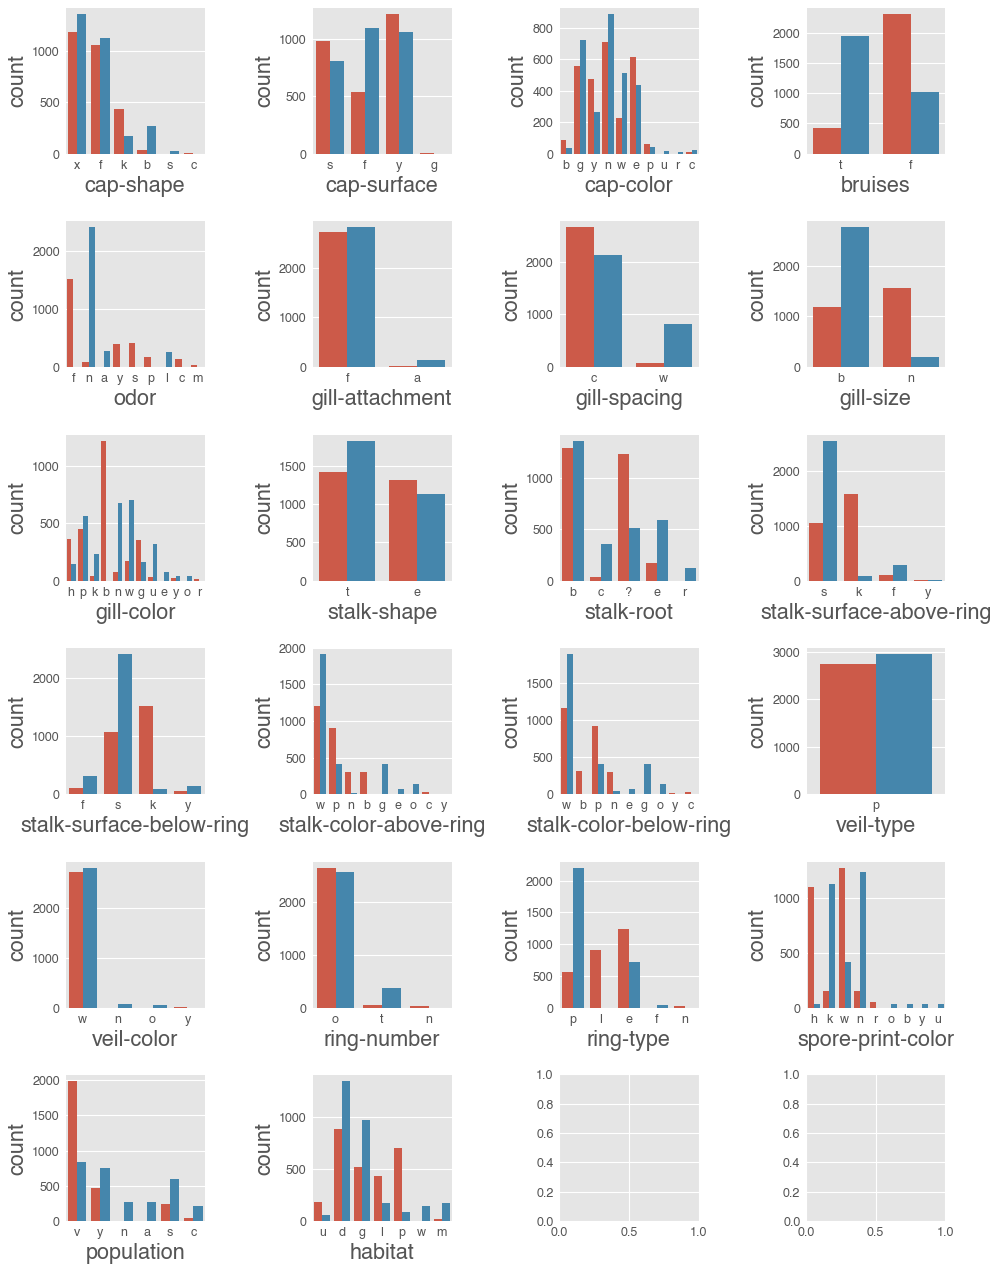

In [13]:
fig, axs = plt.subplots(6, 4, figsize=(14,18))
hlp.plot_counts_bygroup(Xy_train_df, features, 'class', fig, axs)
plt.show()

## Preparing Train Data for Modeling

In [14]:
# Get dummies for all features
X_train_df_wdummies = pd.get_dummies(Xy_train_df[list(features)])
X_train_df_wdummies.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [15]:
# Store feature names after getting dummies, create final features array
features_dummies = X_train_df_wdummies.columns
X_train_wdummies = X_train_df_wdummies.to_numpy()
X_train_wdummies.shape

(5686, 117)

In [16]:
(y_train == 'p').astype(int)

array([1, 0, 1, ..., 0, 1, 0])

In [17]:
y_train_binary = (y_train == 'p').astype(int)
y_train_binary.shape

(5686,)

## Modeling

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.linear_model import Ridge 
from sklearn.linear_model import Lasso 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc

In [19]:
knn = KNeighborsClassifier()
logreg = LogisticRegression()
ridge = Ridge()
lasso = Lasso()
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
gb = GradientBoostingClassifier()

# models = [knn, logreg, ridge, lasso, tree, forest, gb]
models = [knn, logreg, tree, forest, gb]

I will evaluate various classification models through 10-fold cross-validation on the training data.

I want to minimize false negative rate (predicting poisonous mushrooms as edible),
while maximizing sensitivity (true positive rate or recall) and specificity (true negative rate).

In [20]:
roc_auc_scores = dict.fromkeys(models)

for model in models:
#     model.fit(X_train_wdummies, y_train_binary)
    roc_auc_scores[model] = np.mean(cross_val_score(model, X_train_wdummies, y_train_binary, cv=10, scoring='roc_auc'))

/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Defau

In [21]:
for k, v in roc_auc_scores.items():
    print('{} \nScore: {}\n\n'.format(k, v))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform') 
Score: 1.0


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 
Score: 1.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') 
Score: 0.9996336996336996


RandomForestClassifier(boo

## Final Test

In [22]:
X_test_df = pd.DataFrame(X_test, columns=list(features))
X_test_df_wdummies = pd.get_dummies(X_test_df)
X_test_wdummies = X_test_df_wdummies.to_numpy()
X_test_wdummies.shape

(2438, 117)

In [23]:
y_test_binary = (y_test == 'p').astype(int)
y_test_binary.shape

(2438,)

In [24]:
for model in models:
    temp = model.fit(X_train_wdummies, y_train_binary)
    y_pred = model.predict(X_test_wdummies)
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred)
    print('{}:\n auc:{}, acc:{}\n\n'.format(model, auc(fpr, tpr), model.score(X_test_wdummies, y_pred)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'):
 auc:1.0, acc:1.0


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False):
 auc:1.0, acc:1.0


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best'):
 auc:1.0, acc:1.0


RandomForestClassifi

/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False):
 auc:1.0, acc:1.0




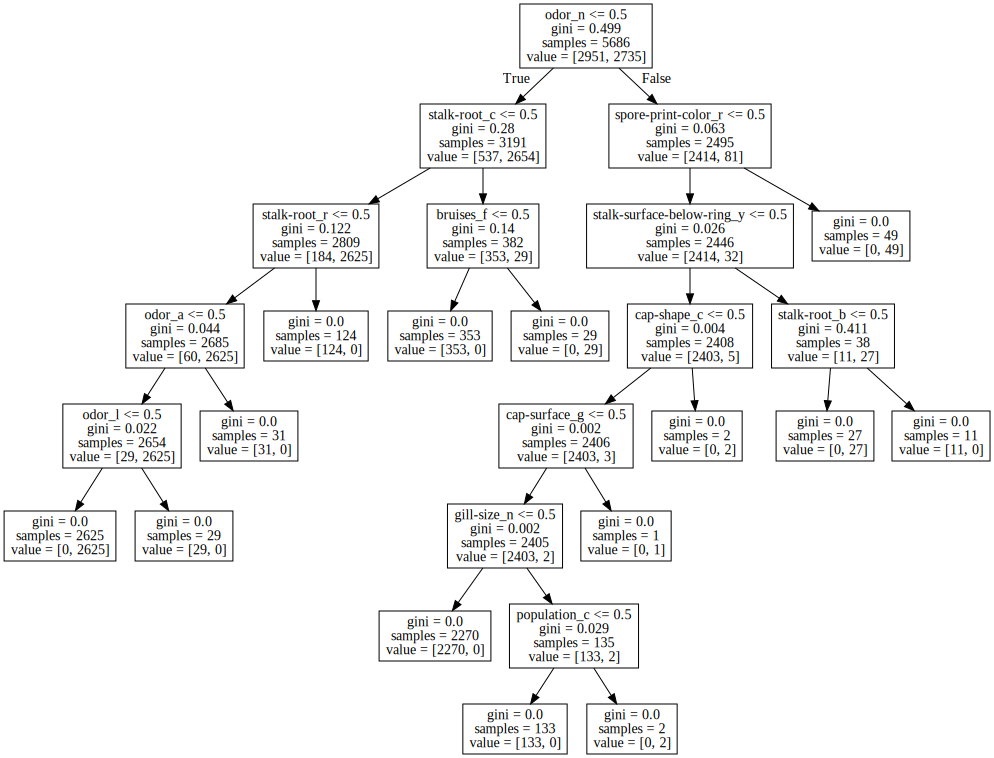

In [27]:
from graphviz import Source
Source(hlp.plot_tree(tree, list(features_dummies)))

<module 'matplotlib.pyplot' from '/Users/chelsearamos/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

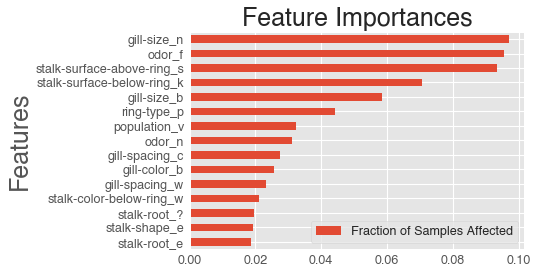

In [28]:
hlp.plot_topN_features(forest.feature_importances_, features_dummies, 15)